In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
wine_df = pd.read_csv("wine.csv")
features = wine_df.drop(columns=["Type"])

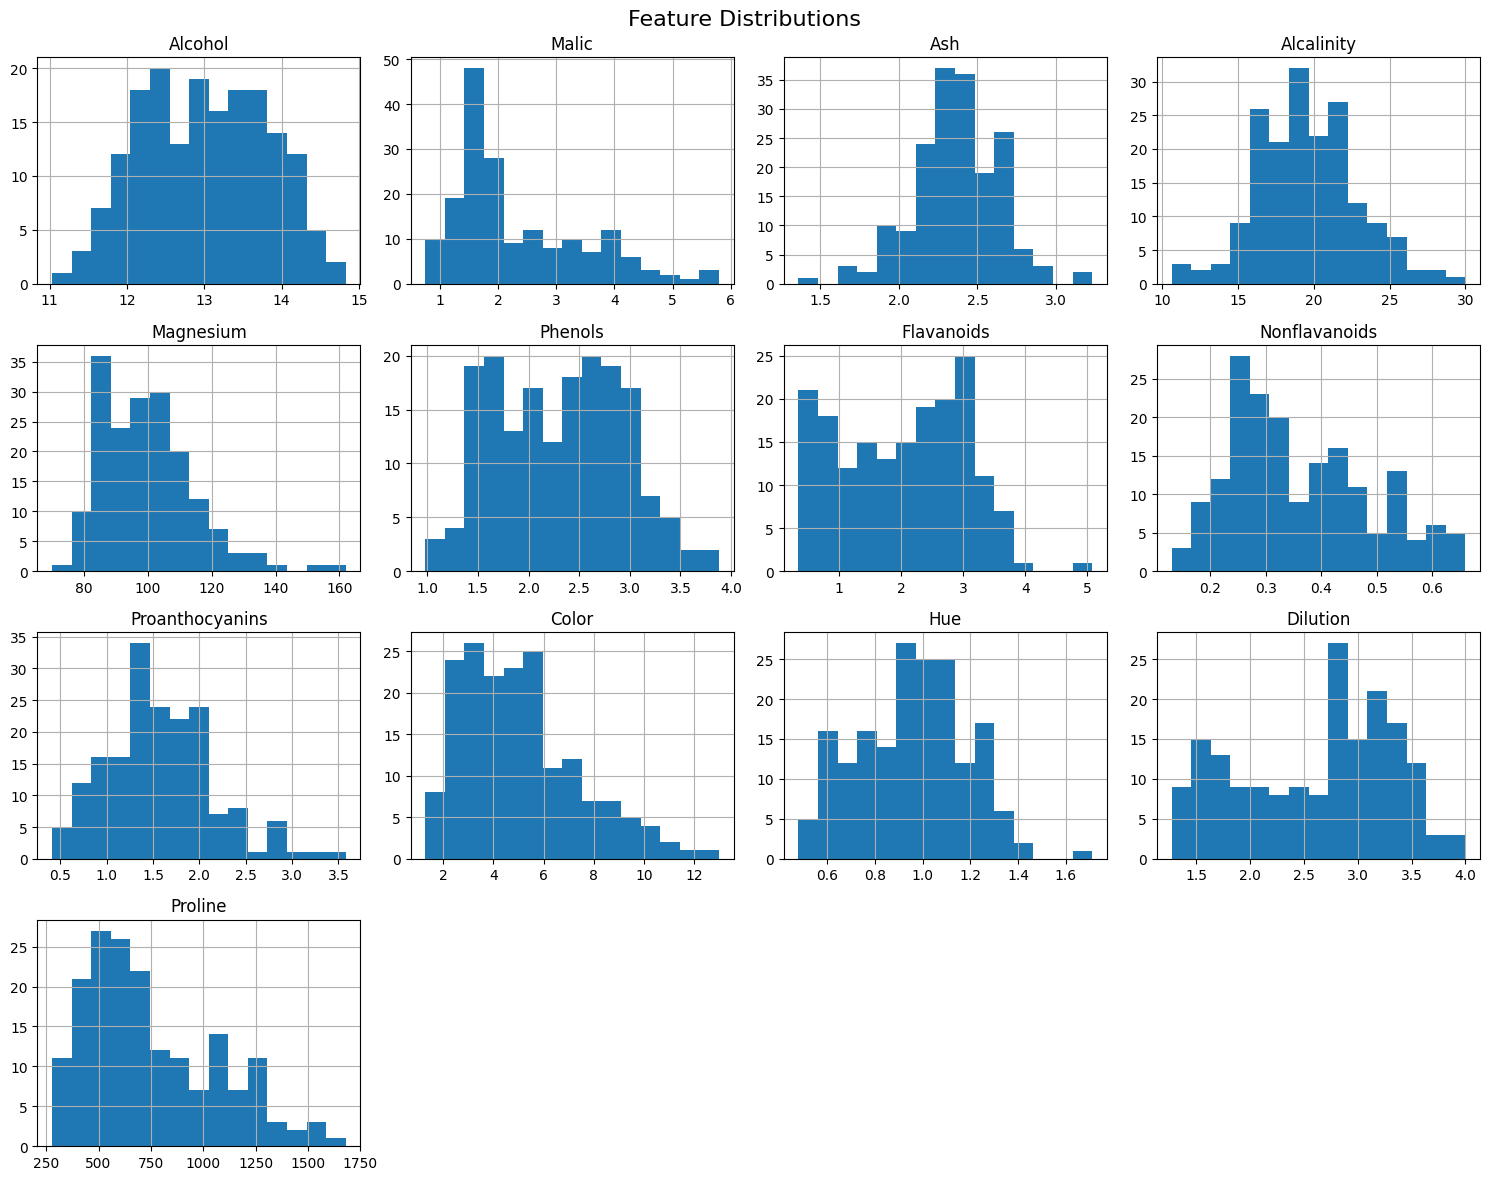

In [3]:
# --- Task 1: EDA ---
# Histograms
features.hist(bins=15, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.savefig("histograms.png")

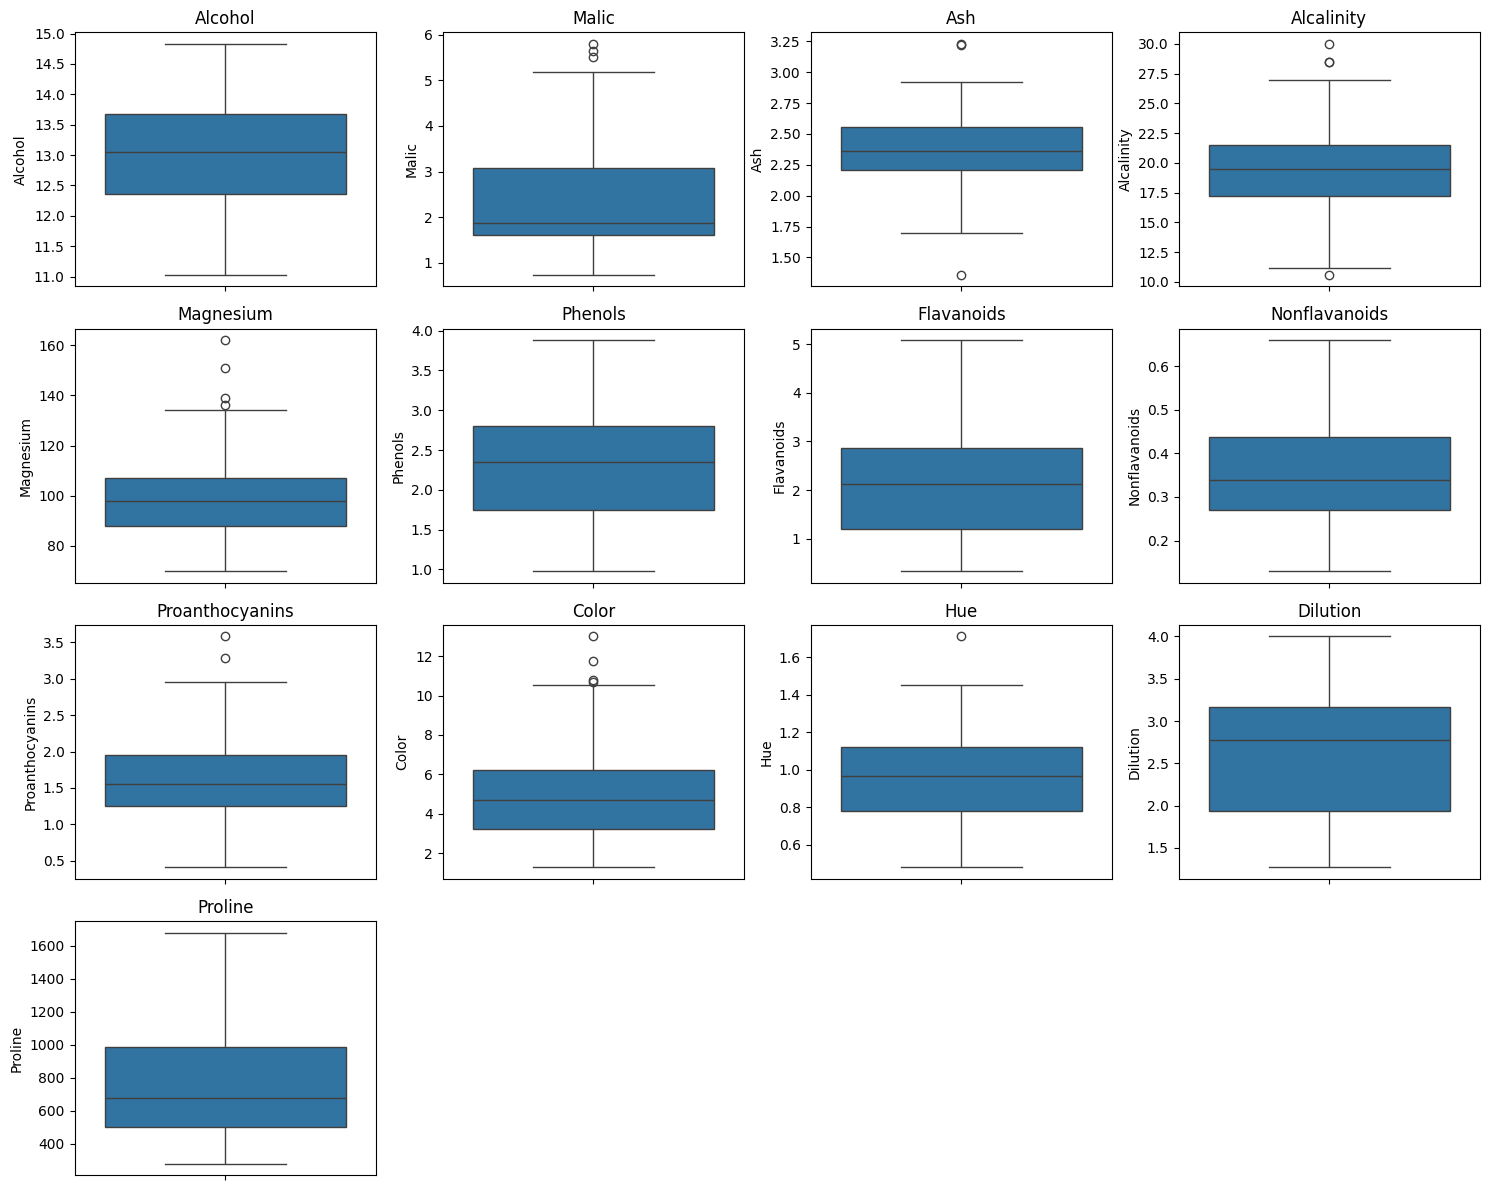

In [4]:
# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(features.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=features[col])
    plt.title(col)
plt.tight_layout()
plt.savefig("boxplots.png")

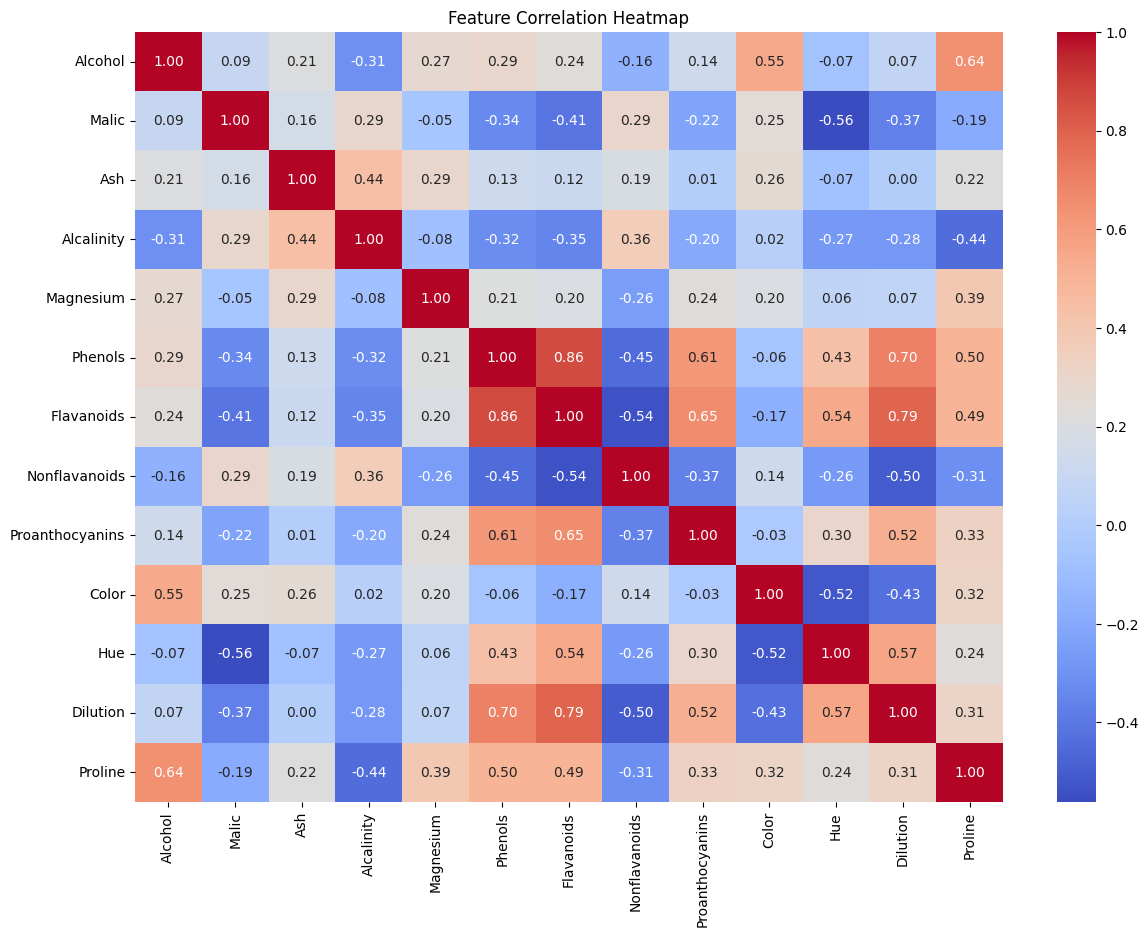

In [5]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")

In [6]:
# --- Task 2: PCA ---
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [7]:
# Initial PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

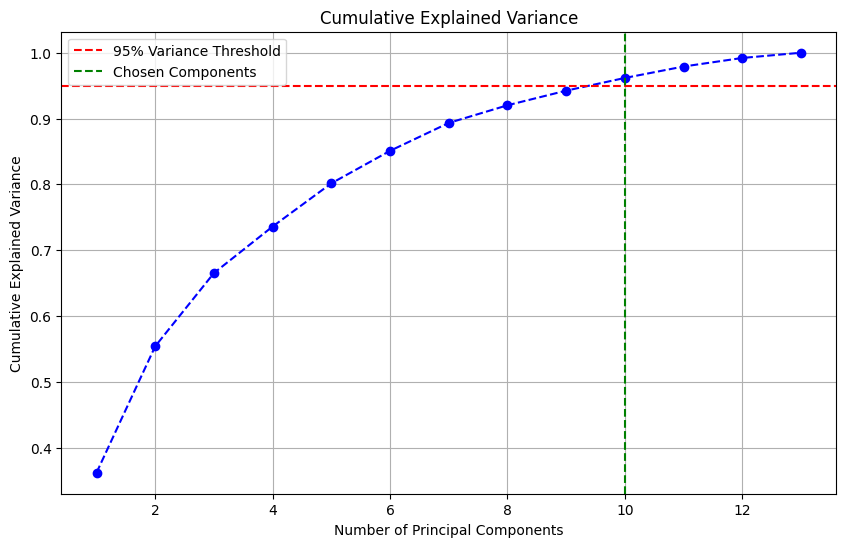

In [8]:
# Cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95)+1, color='g', linestyle='--', label='Chosen Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.savefig("pca_variance.png")

In [9]:
# Reduce to optimal components
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
pca_opt = PCA(n_components=optimal_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

Text(0.5, 1.0, 'Elbow Method')

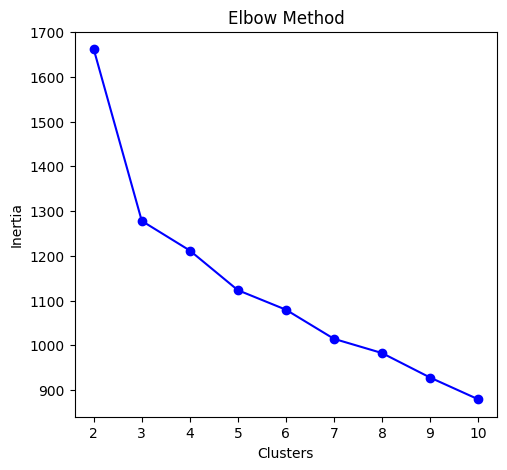

In [10]:
# --- Task 3: Clustering on Original Data ---
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

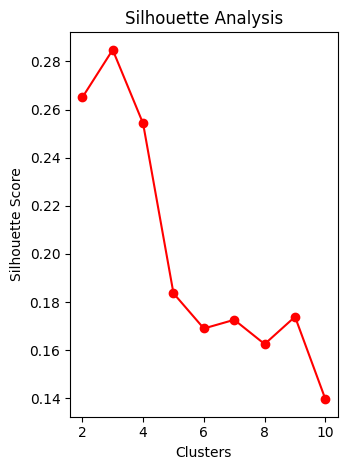

In [11]:
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.savefig("elbow_silhouette.png")

In [12]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans_original.fit_predict(X_scaled)
original_silhouette = silhouette_score(X_scaled, original_labels)
original_db_score = davies_bouldin_score(X_scaled, original_labels)

In [13]:
# --- Task 4: Clustering on PCA Data ---
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca_opt)
pca_silhouette = silhouette_score(X_pca_opt, pca_labels)
pca_db_score = davies_bouldin_score(X_pca_opt, pca_labels)

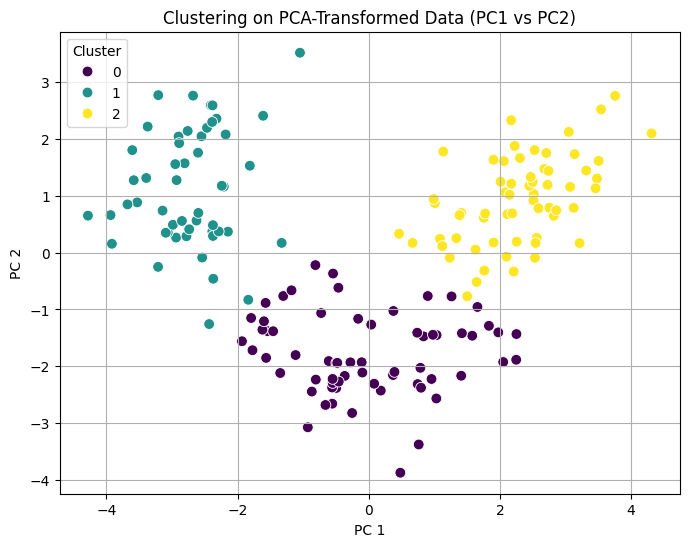

In [14]:
# Scatterplot of PCA Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue=pca_labels, palette="viridis", s=60)
plt.title("Clustering on PCA-Transformed Data (PC1 vs PC2)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig("pca_clusters.png")

In [15]:
# --- Task 5: Comparison Summary ---
print("Original Data Clustering:")
print(f"  Silhouette Score: {original_silhouette:.3f}")
print(f"  Davies–Bouldin Index: {original_db_score:.3f}")

print("\nPCA-Transformed Data Clustering:")
print(f"  Silhouette Score: {pca_silhouette:.3f}")
print(f"  Davies–Bouldin Index: {pca_db_score:.3f}")

print("\nComparison Summary:")
print(f"Silhouette Score Improvement: {pca_silhouette - original_silhouette:.3f}")
print(f"Davies–Bouldin Index Reduction: {original_db_score - pca_db_score:.3f}")

Original Data Clustering:
  Silhouette Score: 0.285
  Davies–Bouldin Index: 1.389

PCA-Transformed Data Clustering:
  Silhouette Score: 0.299
  Davies–Bouldin Index: 1.336

Comparison Summary:
Silhouette Score Improvement: 0.014
Davies–Bouldin Index Reduction: 0.053


In [16]:
# --- Task 6: Conclusion and Insights ---
with open("summary.txt", "w") as f:
    f.write("PCA and Clustering Analysis Summary\n")
    f.write("----------------------------------\n")
    f.write(f"Optimal PCA Components: {optimal_components}\n")
    f.write(f"Original Silhouette Score: {original_silhouette:.3f}\n")
    f.write(f"PCA Silhouette Score: {pca_silhouette:.3f}\n")
    f.write(f"Original DB Index: {original_db_score:.3f}\n")
    f.write(f"PCA DB Index: {pca_db_score:.3f}\n\n")
    f.write("Conclusion:\n")
    f.write("PCA reduced the dimensionality effectively while preserving over 95% of the variance.\n")
    f.write("Clustering on PCA-transformed data showed slightly better performance in silhouette score and Davies–Bouldin index.\n")
    f.write("This suggests PCA can help improve clustering by removing noise and redundancy.\n")
    f.write("PCA is especially useful when dealing with high-dimensional data or correlated features.\n")